# PageRank Implementation

## Methods To Implement Page Rank


We can compute PageRank in three ways
   - Random surfer
   - Probability spreading
   - Eigen vector of Transition Probability Matrix

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

### Checking Graph Stats

In [3]:
def graph_stats(G):
    print("Number of nodes\t= ", G.number_of_nodes())
    print("Number of edges\t= ", G.number_of_edges())
    print("Average degree \t\t= ", 2.0*G.number_of_edges()/G.number_of_nodes())
    print("Is strongly connected\t= ", nx.is_strongly_connected(G))

## PageRank

### 1. Using Built-In Function

In [4]:

df = pd.read_csv("/Users/adityamishra/Documents/Machine Learning Tutorial/1. Machine Learning Specialisation/Important-ML-Implementations/8-NetworkX/data/got-edges.csv")
G = nx.from_pandas_edgelist(df, source = 'Source', target='Target', create_using=nx.DiGraph)# in this line we are 
graph_stats(G)

Number of nodes	=  107
Number of edges	=  352
Average degree 		=  6.579439252336448
Is strongly connected	=  False


### Calculating the PageRank using the `nx.pagerank()` Function

In [7]:
#Calculating the in and out degrees
dfG = pd.DataFrame(data=G.nodes(), columns=['Name'])
dfG['InDeg']=dfG['Name'].map(G.in_degree)
dfG['OutDeg'] = dfG['Name'].map(G.out_degree)
dfG['PageRank']= dfG['Name'].map(nx.pagerank(G))
dfG['PageRanxM'] = dfG['Name']*G.number_of_edges()
dfG.sort_values('InDeg', ascending=False).head(10)

,Name,InDeg,OutDeg,PageRank,PageRanxM
5,Robert,13,5,0.013432,RobertRobertRobertRobertRobertRobertRobertRobe...
6,Tyrion,12,24,0.013550,TyrionTyrionTyrionTyrionTyrionTyrionTyrionTyri...
4,Jaime,9,15,0.011496,JaimeJaimeJaimeJaimeJaimeJaimeJaimeJaimeJaimeJ...
51,Stannis,8,6,0.009496,StannisStannisStannisStannisStannisStannisStan...
24,Sandor,7,6,0.008425,SandorSandorSandorSandorSandorSandorSandorSand...
27,Loras,7,2,0.024829,LorasLorasLorasLorasLorasLorasLorasLorasLorasL...
2,Samwell,7,8,0.025444,SamwellSamwellSamwellSamwellSamwellSamwellSamw...
47,Petyr,7,0,0.010491,PetyrPetyrPetyrPetyrPetyrPetyrPetyrPetyrPetyrP...
19,Gregor,7,5,0.009566,GregorGregorGregorGregorGregorGregorGregorGreg...
84,Margaery,7,0,0.032841,MargaeryMargaeryMargaeryMargaeryMargaeryMargae...


<Axes: xlabel='OutDeg', ylabel='PageRank'>

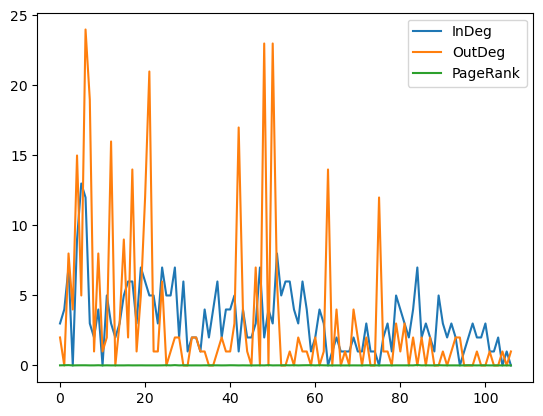

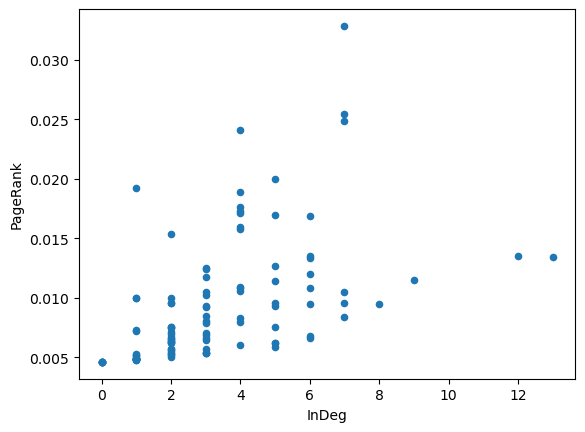

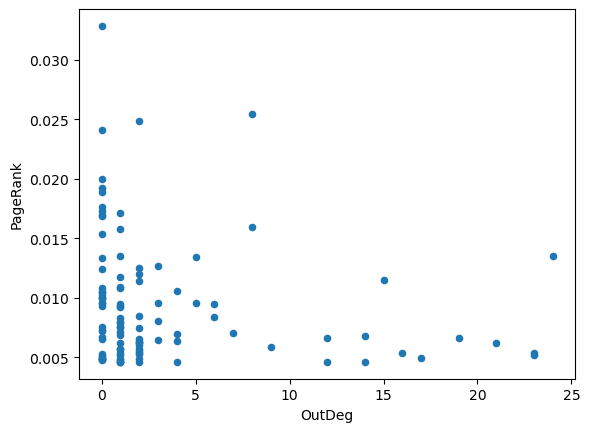

In [8]:
#Plots
dfG.plot()
dfG.plot(kind='scatter', x='InDeg', y='PageRank')
dfG.plot(kind='scatter', x='OutDeg', y='PageRank')